#### 텐서플로 버전확인

In [1]:
import tensorflow as tf

print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 텐서 생성 : List 생성

In [3]:
[1,2,3] # 1차원

[1, 2, 3]

In [4]:
[[1,2,3],[4,5,6]] # 2차원

[[1, 2, 3], [4, 5, 6]]

In [5]:
arr = np.array([1,2,3])
arr.shape

(3,)

In [6]:
arr = np.array([[1,2,3], [4,5,6]])
arr.shape

(2, 3)

In [8]:
# 텐서플로에서 리스트 생성하는 법
tf.constant([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

#### 텐서 생성 : Tuple 생성

In [9]:
tf.constant(((1,2,3),(4,5,6)))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [11]:
import tensorflow as tf

a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

In [14]:
d = tf.multiply(a,b)
e = tf.add(c,b)
f = tf.subtract(d,e)

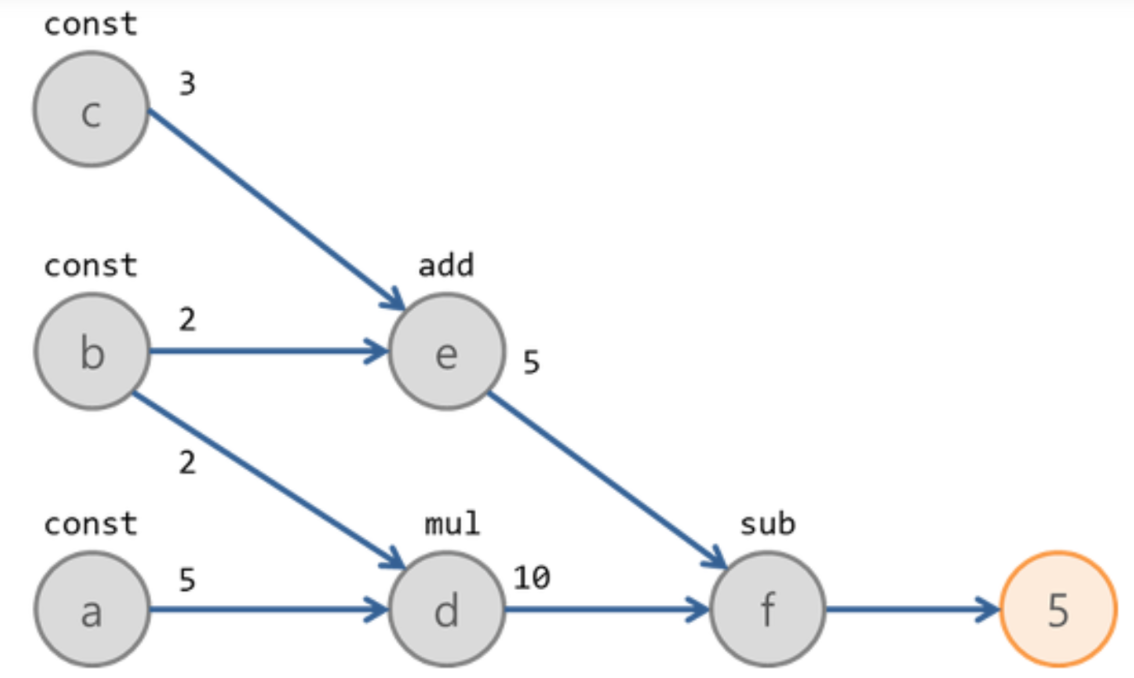

In [18]:
tf.print('연산결과 :', d)
tf.print('연산결과 :', e)
tf.print('연산결과 :', f)

연산결과 : 10
연산결과 : 5
연산결과 : 5


### 문자열 출력

In [20]:
import tensorflow as tf

tensor_a = tf.constant('hello tensor')

In [22]:
tensor_a

<tf.Tensor: shape=(), dtype=string, numpy=b'hello tensor'>

In [23]:
tensor_a.numpy()

b'hello tensor'

In [27]:
type(tensor_a)

tensorflow.python.framework.ops.EagerTensor

In [28]:
type(tensor_a.numpy())

bytes

In [29]:
tensor_a.numpy().decode('utf-8')

'hello tensor'

### 텐서값으로 한글을 사용하는 경우

In [30]:
tensor_a = tf.constant('텐서')

In [33]:
tensor_a.numpy().decode('utf-8')

'텐서'

In [34]:
tf.constant(100)

<tf.Tensor: shape=(), dtype=int32, numpy=100>

- shape = () 괄호가 비어 있는 경우 상수텐서라는 의미이다.

In [36]:
tensor_a = tf.constant(2)

In [37]:
tensor_b = tf.constant(3)

In [38]:
tensor_c = tf.constant(5)

In [39]:
tensor_d = tf.add(tensor_a, tensor_b)

In [41]:
tensor_e = tf.multiply(tensor_d, tensor_c)

### 행렬곱 계산


In [42]:
tensor_matrixA = tf.constant([[1,2],[3,4]])

In [43]:
tensor_matrixA

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [44]:
tensor_matrixB = tf.constant([[2,0],[0,2]])

In [45]:
tensor_matrixB

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 0],
       [0, 2]])>

In [47]:
tensor_matrixC = tf.matmul(tensor_matrixA, tensor_matrixB)
tensor_matrixC

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 4],
       [6, 8]])>

### 집계함수(사칙연산), Masking 연산

In [48]:
import tensorflow as tf
import numpy as np

In [49]:
matrix = np.arange(8).reshape(2,4)
matrix

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [50]:
# 총합계
np.sum(matrix)

28

In [51]:
# 최대값
np.max(matrix)

7

In [52]:
# 최소값
np.min(matrix)

0

In [53]:
# 평균값
np.mean(matrix)

3.5

In [56]:
# 각 열의 합계
np.sum(matrix, axis=0)

array([ 4,  6,  8, 10])

In [57]:
# 각 행의 합계
np.sum(matrix, axis=1)

array([ 6, 22])

In [58]:
# 표준편차
np.std(matrix)

2.29128784747792

In [59]:
# 5보다 작은 수 만 출력 (마스킹)
matrix[matrix < 5]

array([0, 1, 2, 3, 4])

# 텐서보드 실행하기

텐서플로 결과를 웹 브라우저로 확인하기

**주의사항 : 주피터 노트북이 아닌 cmd창에서 실행한다.** 

In [60]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

# Define the model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

(train_images, train_labels), _ = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0

# Define the Keras TensorBoard callback.
logdir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model.fit(
    train_images,
    train_labels, 
    batch_size=64,
    epochs=5, 
    callbacks=[tensorboard_callback])

4423680/4422102 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.9237 - accuracy: 0.6856
Epoch 2/5
938/938 [==============================] - 1s 884us/step - loss: 0.5078 - accuracy: 0.8206
Epoch 3/5
938/938 [==============================] - 1s 894us/step - loss: 0.4487 - accuracy: 0.8404
Epoch 4/5
938/938 [==============================] - 1s 872us/step - loss: 0.4286 - accuracy: 0.8457
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.4125 - accuracy: 0.8505
